In [2]:

import re
import ujson as json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter
from pprint import pprint
from tqdm import tqdm


font = {"family" : "Times New Roman",
        "size"   : 14,
        "weight": "bold"}
plt.rc("font", **font)


colors = [(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]
 
colors = np.asarray(colors)

In [ ]:
plt.figure(figsize=(10, 8))
labels = [" w/o Attr.", " w/ brand", " w/ category", "w/ Attrs."]
base_hits = [34.286, 29.58, 23.97, 32.16]
base_bar = plt.bar(np.arange(len(labels)) - 0.2, base_hits, width=0.4, color=colors[4], label="GCE-GNN")
for rect in base_bar:
    plt.text(rect.get_x() + rect.get_width()/2.0, rect.get_height(), "%.2f" % (rect.get_height()), ha="center", va="bottom", fontsize=18)
our_hits = [43.36, 43.616, 44.144, 44.092]
our_bar = plt.bar(np.arange(len(labels)) + 0.2, our_hits, width=0.4, color=colors[3], label="FAPAT")
for rect in our_bar:
    plt.text(rect.get_x() + rect.get_width()/2.0, rect.get_height(), "%.2f" % (rect.get_height()), ha="center", va="bottom", fontsize=18)
plt.xticks(list(range(len(labels))), labels, rotation=45, fontsize=24)
plt.ylim(21, 50)
plt.yticks(fontsize=24)
plt.legend(loc="upper left", fontsize=20)
plt.ylabel("Hits@20", fontsize=24)

plt.savefig("tmall_attr.pdf", bbox_inches="tight")
plt.show()

In [23]:
rect.get_height()

32.45

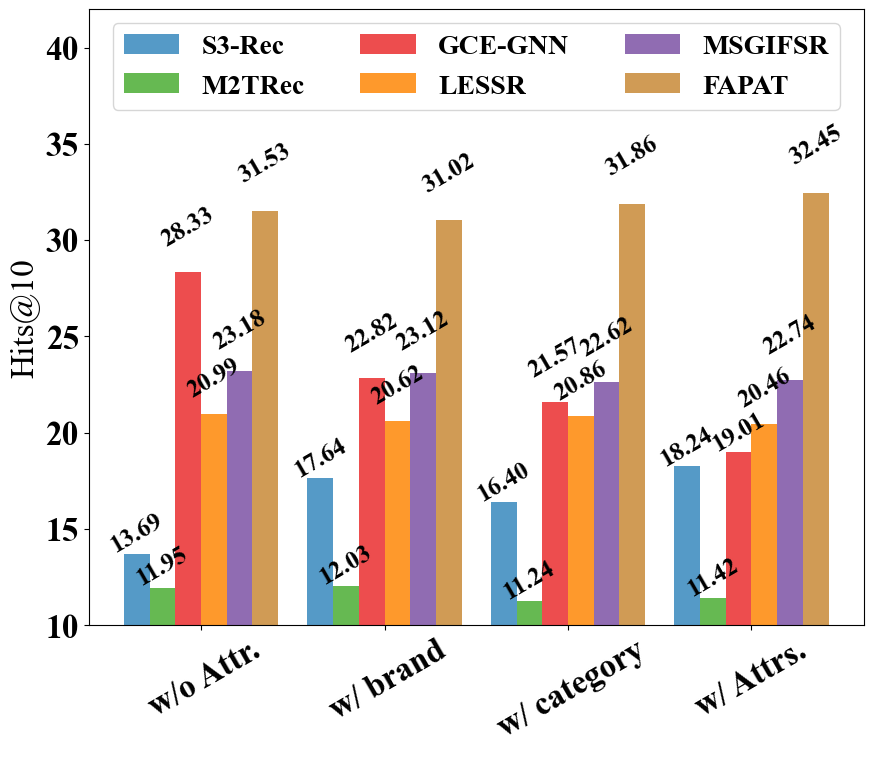

In [117]:
plt.figure(figsize=(10, 8))
labels = [" w/o Attr.", " w/ brand", " w/ category", "w/ Attrs."]
models = ["S3-Rec", "M2TRec", "GCE-GNN", "LESSR", "MSGIFSR", "FAPAT"]
s3rec_hits = [13.69, 17.64, 16.40, 18.24]
m2trec_hits = [11.95, 12.03, 11.24, 11.42]
gcegnn_hits = [28.33, 22.82, 21.57, 19.01]
lessr_hits = [20.99, 20.62, 20.86, 20.46]
msgifsr_hits = [23.18, 23.12, 22.62, 22.74]
our_hits = [31.53, 31.02, 31.86, 32.45]

bar_colors = [colors[0] * 0.4 + colors[1] * 0.6, colors[2] * 0.4 + colors[3] * 0.6, colors[4] * 0.4 + colors[5] * 0.6, colors[6] * 0.4 + colors[7] * 0.6, colors[8] * 0.4 + colors[9] * 0.6, colors[10] * 0.4 + colors[11] * 0.6]
for i, hits in enumerate([s3rec_hits, m2trec_hits, gcegnn_hits, lessr_hits, msgifsr_hits, our_hits]):
    bar = plt.bar(np.arange(len(labels)) - 0.14 * 2.5 + i * 0.14, hits, width=0.14, color=bar_colors[i], label=models[i])
    for rect in bar:
        if rect.get_height() < 20:
            plt.text(rect.get_x() + rect.get_width()/2.0, rect.get_height() * 0.99, "%.2f" % (rect.get_height()), ha="center", va="bottom", rotation=30, fontsize=18)
        elif rect.get_height() < 21:
            plt.text(rect.get_x() + rect.get_width()/2.0, rect.get_height() * 1.03, "%.2f" % (rect.get_height()), ha="center", va="bottom", rotation=30, fontsize=18)
        elif rect.get_height() < 23:
            plt.text(rect.get_x() + rect.get_width()/2.0, rect.get_height() * 1.05, "%.2f" % (rect.get_height()), ha="center", va="bottom", rotation=30, fontsize=18)
        else:
            plt.text(rect.get_x() + rect.get_width()/2.0, rect.get_height() * 1.04, "%.2f" % (rect.get_height()), ha="center", va="bottom", rotation=30, fontsize=18)

plt.xticks(list(range(len(labels))), labels, rotation=30, fontsize=24)
plt.ylim(10, 42)
plt.yticks(fontsize=24)
plt.legend(loc="upper center", fontsize=20, ncol=3)
plt.ylabel("Hits@10", fontsize=24)

plt.savefig("tmall_attr.pdf", bbox_inches="tight")
plt.show()

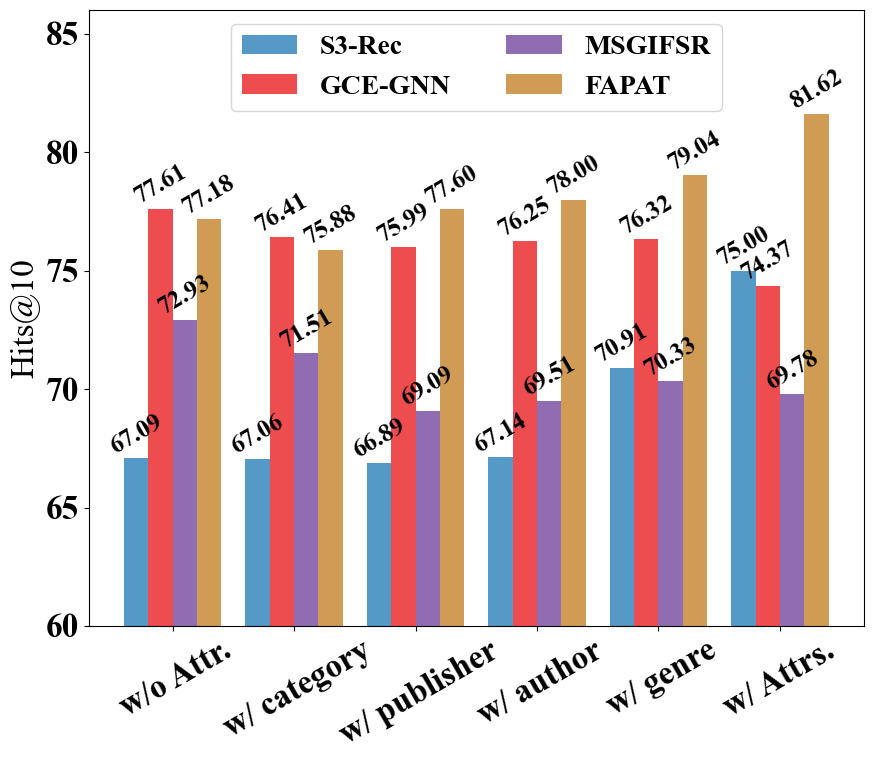

In [133]:
plt.figure(figsize=(10, 8))
labels = [" w/o Attr.", " w/ category", " w/ publisher", " w/ author", " w/ genre", "w/ Attrs."]
models = ["S3-Rec", "GCE-GNN", "MSGIFSR", "FAPAT"]
s3rec_hits = [67.09, 67.06, 66.89, 67.14, 70.91, 75.00]
gcegnn_hits = [77.61, 76.41, 75.99, 76.25, 76.32, 74.37]
msgifsr_hits = [72.93, 71.51, 69.09, 69.51, 70.33, 69.78]
our_hits = [77.18, 75.88, 77.60, 78.00, 79.04, 81.62]

bar_colors = [colors[0] * 0.4 + colors[1] * 0.6, colors[4] * 0.4 + colors[5] * 0.6, colors[8] * 0.4 + colors[9] * 0.6, colors[10] * 0.4 + colors[11] * 0.6]
for i, hits in enumerate([s3rec_hits, gcegnn_hits, msgifsr_hits, our_hits]):
    bar = plt.bar(np.arange(len(labels)) - 0.2 * 1.5 + i * 0.2, hits, width=0.2, color=bar_colors[i], label=models[i])
    for rect in bar:
        if rect.get_height() < 20:
            plt.text(rect.get_x() + rect.get_width()/2.0, rect.get_height() * 0.99, "%.2f" % (rect.get_height()), ha="center", va="bottom", rotation=30, fontsize=18)
        elif rect.get_height() < 21:
            plt.text(rect.get_x() + rect.get_width()/2.0, rect.get_height() * 1.00, "%.2f" % (rect.get_height()), ha="center", va="bottom", rotation=30, fontsize=18)
        elif rect.get_height() < 23:
            plt.text(rect.get_x() + rect.get_width()/2.0, rect.get_height() * 1.00, "%.2f" % (rect.get_height()), ha="center", va="bottom", rotation=30, fontsize=18)
        else:
            plt.text(rect.get_x() + rect.get_width()/2.0, rect.get_height() * 1.00, "%.2f" % (rect.get_height()), ha="center", va="bottom", rotation=30, fontsize=18)

plt.xticks(list(range(len(labels))), labels, rotation=30, fontsize=24)
plt.ylim(60, 86)
plt.yticks(fontsize=24)
plt.legend(loc="upper center", fontsize=20, ncol=2)
plt.ylabel("Hits@10", fontsize=24)

plt.savefig("book_attr.pdf", bbox_inches="tight")
plt.show()

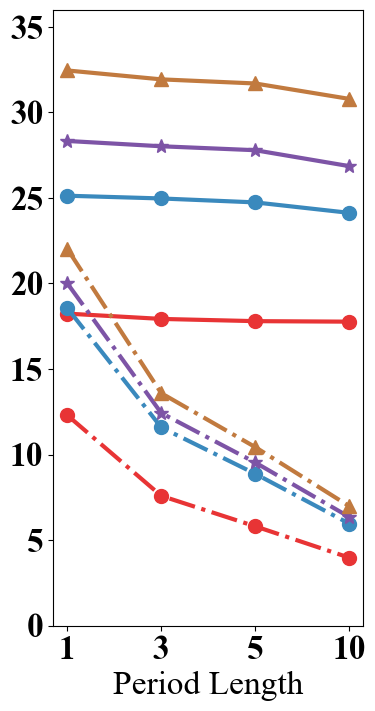

In [103]:
from matplotlib import style


plt.figure(figsize=(4, 8))
X = np.array(4)
labels = ["1", "3", "5", "10"]
csrm_recall10 = [25.13, 24.97, 24.74, 24.13]
csrm_ndcg10 = [18.56, 11.59, 8.88, 5.97]
s3rec_recall10 = [18.24, 17.93, 17.80, 17.77]
s3rec_ndcg10 = [12.30, 7.59, 5.81, 3.98]
gce_gnn_recall10 = [28.33, 28.02, 27.79, 26.86]
gce_gnn_ndcg10 = [20.01, 12.43, 9.54, 6.36]
fapat_recall10 = [32.45, 31.93, 31.69, 30.79]
fapat_ndcg10 = [22.02, 13.59, 10.44, 6.99]
# sorted_disco_co_occur = disco_co_occur.most_common()
plot_colors = [colors[0] * 0.2 + colors[1] * 0.8, colors[4] * 0.2 + colors[5] * 0.8, colors[8] * 0.2 + colors[9] * 0.8, colors[10] * 0.2 + colors[11] * 0.8]

plt.plot(np.arange(len(labels)), csrm_recall10, color=plot_colors[0], label="CSRM (Recall@10)", marker="o", markersize=10, linewidth=3)
plt.plot(np.arange(len(labels)), s3rec_recall10, color=plot_colors[1], label="S3Rec (Recall@10)", marker="o", markersize=10, linewidth=3)
plt.plot(np.arange(len(labels)), gce_gnn_recall10, color=plot_colors[2], label="GCE-GNN (Recall@10)", marker="*", markersize=10, linewidth=3)
plt.plot(np.arange(len(labels)), fapat_recall10, color=plot_colors[3], label="FAPAT (Recall@10)", marker="^", markersize=10, linewidth=3)

plt.plot(np.arange(len(labels)), csrm_ndcg10, color=plot_colors[0], label="CSRM (NDCG@10)", linestyle="-.", marker="o", markersize=10, linewidth=3)
plt.plot(np.arange(len(labels)), s3rec_ndcg10, color=plot_colors[1], label="S3Rec (NDCG@10)", linestyle="-.", marker="o", markersize=10, linewidth=3)
plt.plot(np.arange(len(labels)), gce_gnn_ndcg10, color=plot_colors[2], label="GCE-GNN (NDCG@10)", linestyle="-.", marker="*", markersize=10, linewidth=3)
plt.plot(np.arange(len(labels)), fapat_ndcg10, color=plot_colors[3], label="FAPAT (NDCG@10)", linestyle="-.", marker="^", markersize=10, linewidth=3)

plt.xticks(list(range(len(labels))), labels, fontsize=24)
plt.ylim(0, 36)
plt.yticks(fontsize=24)
plt.xlabel("Period Length", fontsize=24)
# plt.legend(loc="center left", fontsize=16, ncol=1, bbox_to_anchor=(-1.2, 0.5))
plt.savefig("tmall_period.pdf", bbox_inches="tight")
plt.show()

In [89]:
# from matplotlib import style


# plt.figure(figsize=(4, 8))
# X = np.array(4)
# labels = ["1", "3", "5", "10"]
# csrm_recall10 = [89.74]
# csrm_ndcg10 = [75.28]
# s3rec_recall10 = [89.64]
# s3rec_ndcg10 = [75.56]
# gce_gnn_recall10 = [89.34]
# gce_gnn_ndcg10 = [73.15]
# fapat_recall10 = [91.29]
# fapat_ndcg10 = [74.60]
# # sorted_disco_co_occur = disco_co_occur.most_common()
# plot_colors = [colors[0] * 0.2 + colors[1] * 0.8, colors[4] * 0.2 + colors[5] * 0.8, colors[8] * 0.2 + colors[9] * 0.8, colors[10] * 0.2 + colors[11] * 0.8]

# plt.plot(np.arange(len(labels)), csrm_recall10, color=plot_colors[0], label="CSRM (Recall@10)", marker="o", markersize=10, linewidth=3)
# plt.plot(np.arange(len(labels)), s3rec_recall10, color=plot_colors[1], label="S3Rec (Recall@10)", marker="o", markersize=10, linewidth=3)
# plt.plot(np.arange(len(labels)), gce_gnn_recall10, color=plot_colors[2], label="GCE-GNN (Recall@10)", marker="*", markersize=10, linewidth=3)
# plt.plot(np.arange(len(labels)), fapat_recall10, color=plot_colors[3], label="FAPAT (Recall@10)", marker="^", markersize=10, linewidth=3)

# plt.plot(np.arange(len(labels)), csrm_ndcg10, color=plot_colors[0], label="CSRM (NDCG@10)", linestyle="-.", marker="o", markersize=10, linewidth=3)
# plt.plot(np.arange(len(labels)), s3rec_ndcg10, color=plot_colors[1], label="S3Rec (NDCG@10)", linestyle="-.", marker="o", markersize=10, linewidth=3)
# plt.plot(np.arange(len(labels)), gce_gnn_ndcg10, color=plot_colors[2], label="GCE-GNN (NDCG@10)", linestyle="-.", marker="*", markersize=10, linewidth=3)
# plt.plot(np.arange(len(labels)), fapat_ndcg10, color=plot_colors[3], label="FAPAT (NDCG@10)", linestyle="-.", marker="^", markersize=10, linewidth=3)

# plt.xticks(list(range(len(labels))), labels, fontsize=24)
# plt.ylim(0, 85)
# plt.yticks(fontsize=24)
# plt.xlabel("Period Length", fontsize=24)
# plt.legend(loc="lower left", fontsize=16, ncol=2)
# plt.savefig("beauty_period.pdf", bbox_inches="tight")
# plt.show()

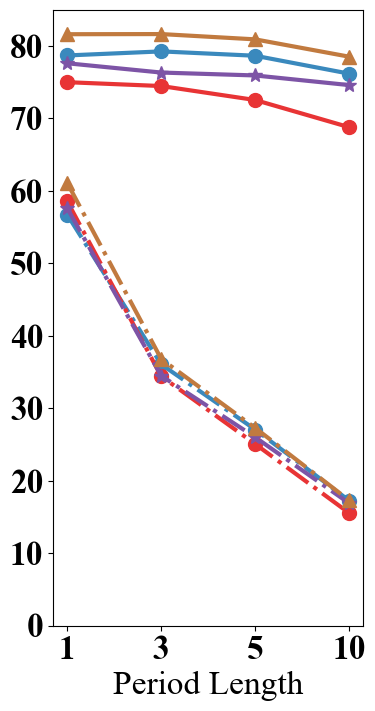

In [134]:
from matplotlib import style
plt.figure(figsize=(4, 8))
X = np.array(4)
labels = ["1", "3", "5", "10"]
csrm_recall10 = [78.69, 79.25, 78.65, 76.18]
csrm_ndcg10 = [56.70, 36.06, 27.07, 17.26]
s3rec_recall10 = [75.00, 74.47, 72.54, 68.79]
s3rec_ndcg10 = [58.54, 34.42, 25.07, 15.55]
gce_gnn_recall10 = [77.61, 76.33, 75.93, 74.60]
gce_gnn_ndcg10 = [57.60, 34.48, 26.01, 16.90]
fapat_recall10 = [81.62, 81.64, 80.91, 78.52]
fapat_ndcg10 = [61.08, 36.80, 27.29, 17.30]
# sorted_disco_co_occur = disco_co_occur.most_common()
plot_colors = [colors[0] * 0.2 + colors[1] * 0.8, colors[4] * 0.2 + colors[5] * 0.8, colors[8] * 0.2 + colors[9] * 0.8, colors[10] * 0.2 + colors[11] * 0.8]

plt.plot(np.arange(len(labels)), csrm_recall10, color=plot_colors[0], label="CSRM (Recall@10)", marker="o", markersize=10, linewidth=3)
plt.plot(np.arange(len(labels)), s3rec_recall10, color=plot_colors[1], label="S3Rec (Recall@10)", marker="o", markersize=10, linewidth=3)
plt.plot(np.arange(len(labels)), gce_gnn_recall10, color=plot_colors[2], label="GCE-GNN (Recall@10)", marker="*", markersize=10, linewidth=3)
plt.plot(np.arange(len(labels)), fapat_recall10, color=plot_colors[3], label="FAPAT (Recall@10)", marker="^", markersize=10, linewidth=3)

plt.plot(np.arange(len(labels)), csrm_ndcg10, color=plot_colors[0], label="CSRM (NDCG@10)", linestyle="-.", marker="o", markersize=10, linewidth=3)
plt.plot(np.arange(len(labels)), s3rec_ndcg10, color=plot_colors[1], label="S3Rec (NDCG@10)", linestyle="-.", marker="o", markersize=10, linewidth=3)
plt.plot(np.arange(len(labels)), gce_gnn_ndcg10, color=plot_colors[2], label="GCE-GNN (NDCG@10)", linestyle="-.", marker="*", markersize=10, linewidth=3)
plt.plot(np.arange(len(labels)), fapat_ndcg10, color=plot_colors[3], label="FAPAT (NDCG@10)", linestyle="-.", marker="^", markersize=10, linewidth=3)

plt.xticks(list(range(len(labels))), labels, fontsize=24)
plt.ylim(0, 85)
plt.yticks(fontsize=24)
plt.xlabel("Period Length", fontsize=24)
# plt.legend(loc="lower left", fontsize=15, ncol=1)
plt.savefig("book_period.pdf", bbox_inches="tight")
plt.show()

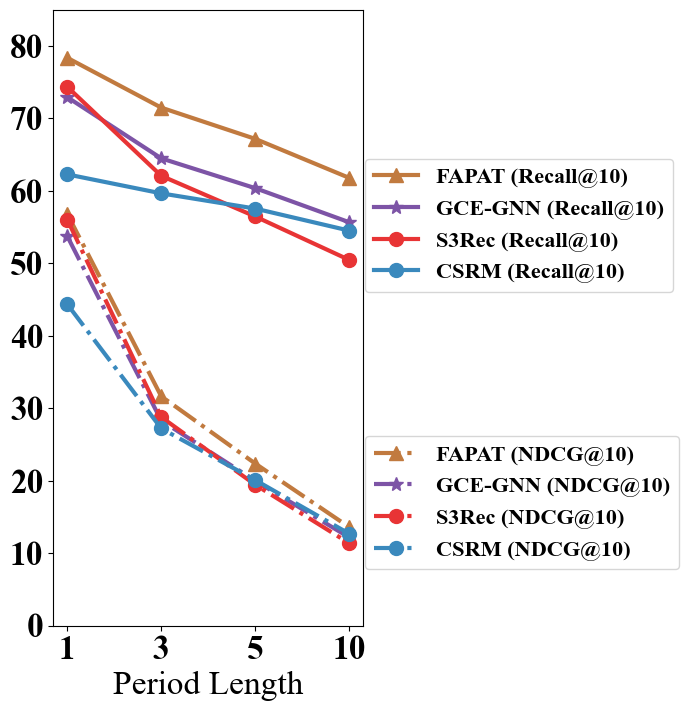

In [132]:
from matplotlib import style
plt.figure(figsize=(4, 8))
X = np.array(4)
labels = ["1", "3", "5", "10"]
csrm_recall10 = [62.28, 59.66, 57.56, 54.52]
csrm_ndcg10 = [44.35, 27.22, 20.10, 12.70]
s3rec_recall10 = [74.36, 62.08, 56.47, 50.48]
s3rec_ndcg10 = [56.03, 28.79, 19.46, 11.39]
gce_gnn_recall10 = [72.93, 64.49, 60.38, 55.68]
gce_gnn_ndcg10 = [53.74, 28.30, 20.00, 12.19]
fapat_recall10 = [78.36, 71.49, 67.18, 61.80]
fapat_ndcg10 = [56.81, 31.65, 22.38, 13.61]
# sorted_disco_co_occur = disco_co_occur.most_common()
plot_colors = [colors[0] * 0.2 + colors[1] * 0.8, colors[4] * 0.2 + colors[5] * 0.8, colors[8] * 0.2 + colors[9] * 0.8, colors[10] * 0.2 + colors[11] * 0.8]

plt.plot(np.arange(len(labels)), fapat_recall10, color=plot_colors[3], label="FAPAT (Recall@10)", marker="^", markersize=10, linewidth=3)
plt.plot(np.arange(len(labels)), gce_gnn_recall10, color=plot_colors[2], label="GCE-GNN (Recall@10)", marker="*", markersize=10, linewidth=3)
plt.plot(np.arange(len(labels)), s3rec_recall10, color=plot_colors[1], label="S3Rec (Recall@10)", marker="o", markersize=10, linewidth=3)
plt.plot(np.arange(len(labels)), csrm_recall10, color=plot_colors[0], label="CSRM (Recall@10)", marker="o", markersize=10, linewidth=3)

plt.plot(np.arange(len(labels)), fapat_ndcg10, color=plot_colors[3], label="FAPAT (NDCG@10)", linestyle="-.", marker="^", markersize=10, linewidth=3)
plt.plot(np.arange(len(labels)), gce_gnn_ndcg10, color=plot_colors[2], label="GCE-GNN (NDCG@10)", linestyle="-.", marker="*", markersize=10, linewidth=3)
plt.plot(np.arange(len(labels)), s3rec_ndcg10, color=plot_colors[1], label="S3Rec (NDCG@10)", linestyle="-.", marker="o", markersize=10, linewidth=3)
plt.plot(np.arange(len(labels)), csrm_ndcg10, color=plot_colors[0], label="CSRM (NDCG@10)", linestyle="-.", marker="o", markersize=10, linewidth=3)

plt.xticks(list(range(len(labels))), labels, fontsize=24)
plt.ylim(0, 85)
plt.yticks(fontsize=24)
plt.xlabel("Period Length", fontsize=24)
lines = plt.gca().get_lines()
legend1 = plt.legend([lines[i] for i in range(0, 4)],[lines[i].get_label() for i in range(0, 4)], loc="center left", fontsize=16, ncol=1, bbox_to_anchor=(0.97, 0.65))
legend2 = plt.legend([lines[i] for i in range(4, 8)],[lines[i].get_label() for i in range(4, 8)], loc="center left", fontsize=16, ncol=1, bbox_to_anchor=(0.97, 0.2))
plt.gca().add_artist(legend1)
plt.savefig("elec_period.pdf", bbox_inches="tight")
plt.show()